In [1]:
!pip install matplotlib

In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

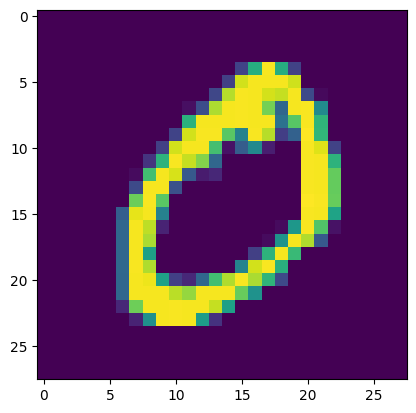

In [5]:
plt.imshow(train_images[1])

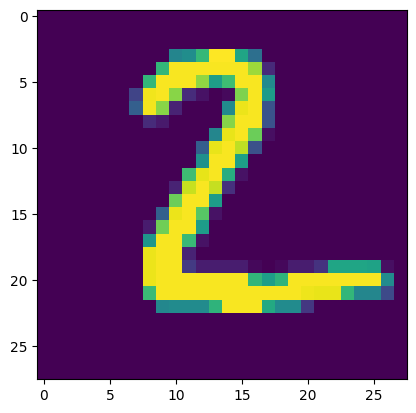

In [6]:
plt.imshow(test_images[1])

In [7]:
train_images, test_images = train_images/255.0, test_images/255.0

In [8]:
import numpy as np
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [9]:
from keras.utils import to_categorical

In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
cnnmodel = Sequential([Conv2D(32,(3,3),activation = "relu", input_shape=(28,28,1)),
                      tf.keras.layers.MaxPooling2D(2,2),
                       Conv2D(64, (3,3), activation="relu"),
                       tf.keras.layers.Flatten(),
                       tf.keras.layers.Dense(10, activation = "softmax")
                      ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnnmodel.compile(optimizer="adam", loss = "categorical_crossentropy",metrics=["accuracy"] )

In [15]:
cnnmodel.fit(train_images, train_labels, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.9128 - loss: 0.2813
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9852 - loss: 0.0484
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9903 - loss: 0.0302


In [16]:
predictions = cnnmodel.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [17]:
for i in range(3):
    print(predictions[i])
    print(test_labels[i])

[1.7969142e-11 1.0586570e-11 1.1679301e-06 8.4413284e-07 2.2022449e-13
 5.8813683e-11 1.6728153e-17 9.9999791e-01 5.0011378e-10 1.7954235e-08]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[5.5685508e-08 1.3197042e-07 9.9999875e-01 1.7367749e-10 2.4841820e-11
 1.8148293e-12 9.9930742e-07 3.3581773e-14 9.5881958e-08 3.5433418e-12]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[8.2168050e-08 9.9993473e-01 9.4504803e-06 3.2071227e-08 1.1855242e-05
 4.8152283e-06 2.7775786e-07 1.8638164e-05 1.9991714e-05 6.8904541e-08]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
cnnmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        77,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,800 (1.10 MB)

 Trainable params: 96,266 (376.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 192,534 (752.09 KB)